# <div class='alert alert-info'>Ad type predictions</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
pd.set_option('display.max_rows', None)

In [49]:
df= pd.read_csv('/Users/rajathadri_as/Documents/FAD - website_ads_ad - 20231130.csv')

C:\Users\rajathadri_as\AppData\Local\Temp\ipykernel_9828\2139548497.py:1: DtypeWarning: Columns (3,17,32,43,47,53,57,58,59,63,77,79,106,107,110,113,116,119,122,132,133,134,136,141,143,144,145,147,151,152,156,158,159,160,163,164,166,173,174,176,177,181,190,191,192,193,194,195,196,197,198,199,204,205,206,207,208,210,212,214,216,217,219,220,222,223,224,226,232,233,234,235,236,240,241,248,249,250,251,254,256,257,258,261,267,269,272,273,274,276,277,278,280,281,283,285,288,290,292,293,303,304,305,308,309,310,311,314,315,316,318,320,321,322,323,324,325,326,327,331,332,333,334,336,337,338,339,340,341,343,344,345,346,348,349,350,351,353,359,364,365,366,367,369,371,373,377,379,385,386,387,391,394,398,399,431,432,439,441,442,443,444,446,448,450,456,457,459,461,463,468,473,477,484,537,539,541) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/Users/rajathadri_as/Documents/FAD - website_ads_ad - 20231130.csv')


In [50]:
df.shape

(161410, 568)

In [51]:
df=df[['title','type_name','type_id','cat_name','cat_id']]

In [52]:
df.head()

,title,type_name,type_id,cat_name,cat_id
0,Free government boiler heating insulation grants,Services,4,Home & Garden,197
1,Solid Farmhouse Table & 6 Dining Chairs,Services,4,Home & Garden,197
2,Citroen C3 2015 in White,Motors,2,Cars,63
3,Handy Joe,Services,4,Home & Garden,197
4,Chair. £5,Services,4,Home & Garden,197


In [53]:
df.isna().sum()

title          254
type_name    28516
type_id          0
cat_name     30360
cat_id           0
dtype: int64

In [54]:
df.dropna(subset=['title'], inplace=True)

In [55]:
df['type_name'].value_counts()

type_name
Motors              48807
Services            27359
For Sale            20605
Adult               14980
Adult Businesses     9595
Animals              8474
Jobs                 1659
Property              693
Events                472
Name: count, dtype: int64

In [56]:
# Handling null values in Type_name
df.loc[df['type_id'] == 4, 'type_name'] = 'Services'
df.loc[df['type_id'] == 9, 'type_name'] = 'Adult Businesses'

In [57]:
# Handling null values in Cat_name
df.loc[df['cat_id'] == 190, 'cat_name'] = 'Business & Office'
df.loc[df['cat_id'] == 191, 'cat_name'] = 'Professional Services'
df.loc[df['cat_id'] == 192, 'cat_name'] = 'Events & Celebrations'
df.loc[df['cat_id'] == 193, 'cat_name'] = 'Family & Care Services'
df.loc[df['cat_id'] == 194, 'cat_name'] = 'Health, Beauty & Wellness'
df.loc[df['cat_id'] == 195, 'cat_name'] = 'Fitness'
df.loc[df['cat_id'] == 196, 'cat_name'] = 'Lessons & Tuition'
df.loc[df['cat_id'] == 197, 'cat_name'] = 'Home & Garden'
df.loc[df['cat_id'] == 198, 'cat_name'] = 'Pets & Horses'
df.loc[df['cat_id'] == 199, 'cat_name'] = 'Motoring & Transport'
df.loc[df['cat_id'] == 201, 'cat_name'] = 'Local Food & Drink'
df.loc[df['cat_id'] == 202, 'cat_name'] = 'Retail'
df.loc[df['cat_id'] == 263, 'cat_name'] = 'Escort Agencies'

In [101]:
df[['cat_id','cat_name']].value_counts().sort_index()

cat_id  cat_name                        
1       Agricultural                          302
2       Antiques & Collectables              1674
3       Baby & Kids                          1033
4       Bicycles                              367
5       Bizarre Bazaar                        401
6       Businesses for sale                  1001
7       Clothing, Footwear & Accessories     2613
8       Computers & Electronics               831
9       Cookware & Dining                     459
10      Consoles                              149
11      DIY                                   581
12      Event Ticket Resales                   83
13      Furniture                            3084
14      Garden                                600
15      Heating & Cooling                     230
16      Hobbies & Leisure                     677
17      Home Appliances                       776
18      Home Decor                            906
19      Lighting                              204
20      M

In [100]:
df['cat_name'] = df['cat_name'].str.replace('and','&')
df['cat_name'] = df['cat_name'].str.replace('+','&')
df['cat_name'] = df['cat_name'].str.replace('Bizaar','Bazaar')

In [102]:
df['type_name'].value_counts()

type_name
Motors              48532
For Sale            18992
Adult               14959
Adult Businesses     9671
Animals              8473
Jobs                 1637
Property              665
Events                438
Name: count, dtype: int64

In [103]:
df = df[df['cat_id']!=0]

In [104]:
df = df[df['type_id']!=0]

In [105]:
df = df[df['type_name'] != 'Services']

In [106]:
df.dropna(inplace=True)

In [107]:
df.isna().sum()

title        0
type_name    0
type_id      0
cat_name     0
cat_id       0
dtype: int64

In [108]:
df.shape

(103367, 5)

In [109]:
df['type_name'].value_counts()

type_name
Motors              48532
For Sale            18992
Adult               14959
Adult Businesses     9671
Animals              8473
Jobs                 1637
Property              665
Events                438
Name: count, dtype: int64

In [110]:
df.head()

,title,type_name,type_id,cat_name,cat_id
2,citroen c whit,Motors,2,Cars,63
26,hand mixer brand new open,For Sale,1,Home Appliances,17
29,mahogany display cabinet,For Sale,1,Antiques & Collectables,2
30,technics mk x rane mixer speaker headphone ful...,For Sale,1,Computers & Electronics,8
32,mega blok castl,For Sale,1,Baby & Kids,3


<Axes: xlabel='type_name'>

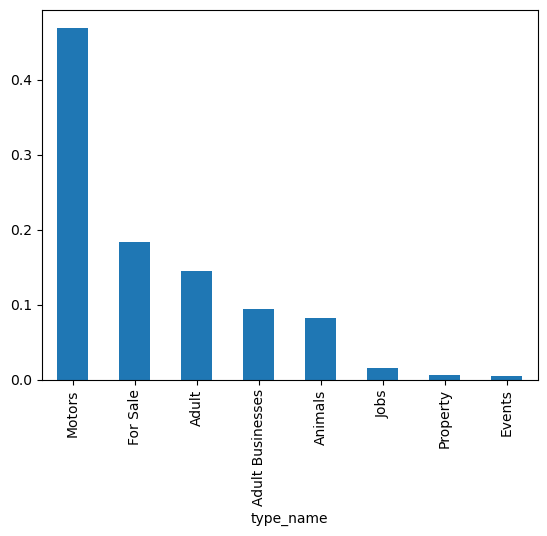

In [111]:
df['type_name'].value_counts(normalize = True).plot.bar()

<Axes: xlabel='cat_name'>

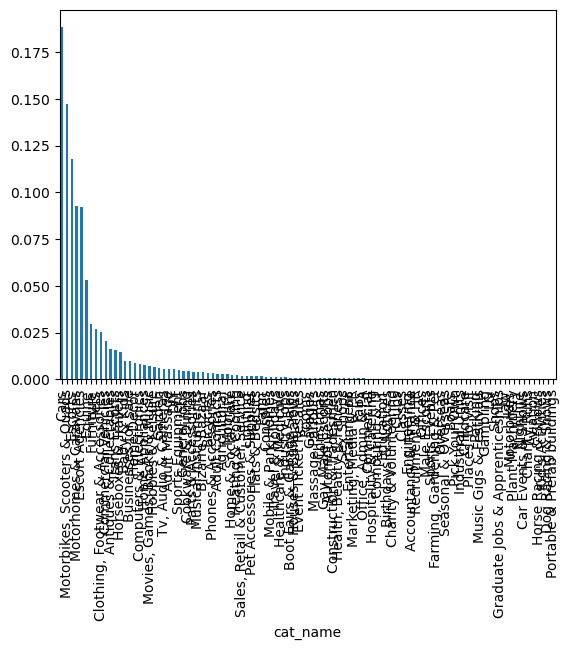

In [112]:
df['cat_name'].value_counts(normalize = True).plot.bar()

# <div class = 'alert alert-info'>NLTK text processing</div>

In [113]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\rajathadri_as\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\rajathadri_as\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\rajathadri_as\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\rajathadri_as\AppData\Roaming\nltk_data.
[nltk_data]    |     ..
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | D

True

In [114]:
# create a list text
text = list(df['title'])

In [115]:
# preprocessing loop
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [116]:
corpus = []

for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

In [117]:
corpus

['citroen c whit',
 'hand mixer brand new open',
 'mahogany display cabinet',
 'technics mk x rane mixer speaker headphone full dj set',
 'mega blok castl',
 'shed fence timber deck',
 'exclusive caravan hire weymouth',
 'child play hous',
 'care support worker hastings st leonard f p w e ev',
 'atw clear',
 'atw clear',
 'diana dildo toy party everyday',
 'bedsit room w',
 'louis tomlinson x factor judge collector doll brand new unopen',
 'hot brenda brazilian new brighton party toy g f',
 'shabby chic paint grandfather chair couri',
 'independent sexy christine tun line back holiday',
 'diana new best party brighton',
 'full service naughti',
 'dalia natural full servic',
 'marine fish tank oak cabinet fish cor',
 'solid pine drawer wax dress table stool couri',
 'set arcoroc continental style glass metal hold',
 'vintage royal doulton bunnykins cricket beach pl',
 'box golf put set',
 'old firework memorabilia',
 'large collector vintage courvoisier star luxe cognac bottl',
 'nautic

In [118]:
#assign corpus to df
df['title'] = corpus
df.head()

,title,type_name,type_id,cat_name,cat_id
2,citroen c whit,Motors,2,Cars,63
26,hand mixer brand new open,For Sale,1,Home Appliances,17
29,mahogany display cabinet,For Sale,1,Antiques & Collectables,2
30,technics mk x rane mixer speaker headphone ful...,For Sale,1,Computers & Electronics,8
32,mega blok castl,For Sale,1,Baby & Kids,3


In [119]:
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

In [120]:
df['title'] = df['title'].apply(lemmatize_words)

In [121]:
df.head()

,title,type_name,type_id,cat_name,cat_id
2,citroen c whit,Motors,2,Cars,63
26,hand mixer brand new open,For Sale,1,Home Appliances,17
29,mahogany display cabinet,For Sale,1,Antiques & Collectables,2
30,technics mk x rane mixer speaker headphone ful...,For Sale,1,Computers & Electronics,8
32,mega blok castl,For Sale,1,Baby & Kids,3


In [122]:
# import these modules
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

In [123]:
df['title'] = df['title'].apply(ps.stem)

In [124]:
df[['type_id','type_name']].value_counts()

type_id  type_name       
2        Motors              48532
1        For Sale            18992
8        Adult               14959
9        Adult Businesses     9671
6        Animals              8473
3        Jobs                 1637
5        Property              665
7        Events                438
Name: count, dtype: int64

In [125]:
df.head()

,title,type_name,type_id,cat_name,cat_id
2,citroen c whit,Motors,2,Cars,63
26,hand mixer brand new open,For Sale,1,Home Appliances,17
29,mahogany display cabinet,For Sale,1,Antiques & Collectables,2
30,technics mk x rane mixer speaker headphone ful...,For Sale,1,Computers & Electronics,8
32,mega blok castl,For Sale,1,Baby & Kids,3


# <div class = 'alert alert-info'>Feature Engineering</div>

In [126]:
df.head(3)

,title,type_name,type_id,cat_name,cat_id
2,citroen c whit,Motors,2,Cars,63
26,hand mixer brand new open,For Sale,1,Home Appliances,17
29,mahogany display cabinet,For Sale,1,Antiques & Collectables,2


### Null Check

In [127]:
df.isnull().sum()

title        0
type_name    0
type_id      0
cat_name     0
cat_id       0
dtype: int64

### Outliers

In [128]:
df.describe()

,type_id,cat_id
count,103367.000000,103367.000000
mean,3.723693,102.012925
std,2.915158,79.409263
min,1.000000,1.000000
25%,2.000000,63.000000
50%,2.000000,67.000000
75%,6.000000,156.000000
max,9.000000,300.000000


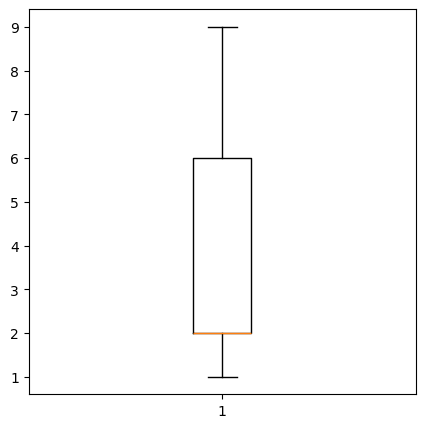

In [129]:
fig = plt.figure(figsize =(5, 5))

plt.boxplot(df['type_id'])
plt.show()

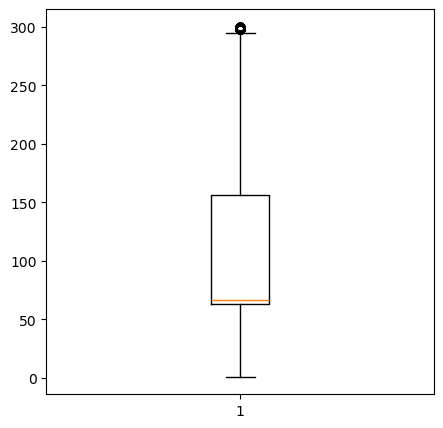

In [130]:
fig = plt.figure(figsize =(5, 5))

plt.boxplot(df['cat_id'])
plt.show()

In [131]:
df['cat_id'].unique()

array([ 63,  17,   2,   8,   3,   6,  25, 124,  13, 182, 138, 151,   9,
        24,   5,  18,  19, 181,  68,  11,  66,   1,  14,  23, 150, 187,
       165, 125,  62,  21,  20, 139,  10,  67,   7,  26, 128, 116, 152,
        16, 130,   4, 131,  69,  22, 115, 120, 123,  15, 109,  64, 112,
       114, 156, 146, 118, 140, 143, 119, 147, 117, 168, 127, 185, 110,
        12, 121, 141, 292, 122,  65, 142, 164, 179, 173, 263, 264, 170,
       126,  84,  90, 166, 144, 298, 259, 149, 177, 145, 129, 174, 178,
       180, 295, 300, 171, 258, 175, 167, 111, 169, 148, 176], dtype=int64)

In [132]:
df['cat_id'].value_counts()

cat_id
63     19469
67     15255
182    12206
68      9568
263     9554
156     5480
13      3084
151     2802
7       2613
64      2136
2       1674
298     1648
66      1489
3       1033
6       1001
18       906
8        831
17       776
21       732
16       677
14       600
26       598
187      597
11       581
24       527
120      481
9        459
69       426
22       414
5        401
4        367
23       352
181      322
1        302
20       281
124      252
15       230
130      209
19       204
152      191
139      179
65       161
10       149
141      136
25       117
122      114
185      108
165       88
138       83
12        83
140       68
142       68
300       65
168       59
292       58
110       58
116       58
123       54
264       52
170       51
127       51
175       48
128       48
144       46
125       45
115       42
117       42
164       41
114       34
173       34
259       31
118       30
109       27
129       25
146       23
295       20
180  

In [47]:
# 292, 295, 298, 300

In [46]:
# df = df[df['cat_id'] < 290]

# <div class = 'alert alert-info'>Modeling - Ad Type</div>

In [91]:
import warnings
warnings.filterwarnings('ignore')

---

In [75]:
X = df['title']
y = df[[
        'type_name'
      ,'cat_name'
       ]]

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [77]:
X_train.shape

(81260,)

In [78]:
X_test.shape

(20316,)

In [79]:
y_train.shape

(81260, 2)

In [80]:
y_test.shape

(20316, 2)

# <div class = 'alert alert-success'> Logistic - Pipeline - MultiOutput</div>

In [145]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [82]:
pipe_lr = Pipeline(steps=[('cv',TfidfVectorizer(analyzer='word',stop_words= 'english')),
                          ('lr_multi',MultiOutputClassifier(
                              GridSearchCV(LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10, 100, 200]}, cv=5)
                              ))]
                  )

In [83]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('cv', TfidfVectorizer(stop_words='english')),
                ('lr_multi',
                 MultiOutputClassifier(estimator=GridSearchCV(cv=5,
                                                              estimator=LogisticRegression(),
                                                              param_grid={'C': [0.001,
                                                                                0.01,
                                                                                0.1,
                                                                                1,
                                                                                10,
                                                                                100,
                                                                                200]})))])

In [84]:
pipe_lr.score(X_train,y_train)

0.9251784395766675

In [85]:
pipe_lr.score(X_test,y_test)

0.8192557590076787

In [86]:
pred1 = 'Four wheel servicing in Brighton'

In [ ]:
X_test.iloc[0]

In [87]:
pipe_lr.predict([pred1])

array([['For Sale', 'Bicycles']], dtype=object)

In [69]:
pipe_lr.predict_proba([pred1])

[array([[0.00235534, 0.01376362, 0.001434  , 0.01512163, 0.92716194,
         0.01448279, 0.02269215, 0.00298854]])]

In [88]:
# Save the model to a file using pickle
filename = 'FAD_MLclassifier_MultiOut.pkl'
with open(filename, 'wb') as file:
    pickle.dump(pipe_lr, file)

In [89]:
file.close()

In [91]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

X_train_cv = tfidfvectorizer.fit_transform(X_train)
X_test_cv = tfidfvectorizer.transform(X_test)

In [92]:
# cv = CountVectorizer()

# X_train_cv = cv.fit_transform(X_train)

X_train_cv.shape

(81260, 22895)

In [93]:
# transform X_test using CV
# X_test_cv = cv.transform(X_test)

X_test_cv.shape

(20316, 22895)

In [ ]:
Break Auto Execution # Self-induced error

---

# <div class = 'alert alert-warning'> Logistic Regression Classifier</div>

In [ ]:
# Logistic Regression model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
lr = LogisticRegression()

lr.fit(X_train_cv, y_train)

In [ ]:
# Predictions
y_pred_test = lr.predict(X_test_cv)
y_pred_test

In [ ]:
y_pred_train = lr.predict(X_train_cv)
y_pred_train

In [ ]:
print(classification_report(y_pred_train, y_train))

In [ ]:
print(classification_report(y_pred_test, y_test))

In [ ]:
cf_matrix = confusion_matrix(y_train, y_pred_train)

print(cf_matrix)

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

# <div class = 'alert alert-success'>CV for Logistic Regression</div>

In [ ]:
lr = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 200]}
grid = GridSearchCV(lr, param_grid, cv=3)
grid.fit(X_train_cv, y_train)


# Recheck the best cross-validation sccore

print("Best cross-validation score:", grid.best_score_)
print("Best parameters:", grid.best_params_)
print("Test set score:", grid.score(X_test_cv, y_test))

In [ ]:
y_pred_test = grid.predict(X_test_cv)

In [ ]:
y_pred_train = grid.predict(X_train_cv)

In [ ]:
print(classification_report(y_train, y_pred_train))

In [ ]:
print("Classification report for test data: \n")
print(classification_report(y_test, y_pred_test))

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

# <div class = 'alert alert-warning'>Random Forest Classifer</div>

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [95]:
clsr = RandomForestClassifier(n_estimators=100)
clsr.fit(X_train_cv, y_train)

RandomForestClassifier()

In [98]:
y_pred_train = clsr.predict(X_train_cv)
train_score = accuracy_score(y_train, y_pred_train)
train_score

ValueError: multiclass-multioutput is not supported

In [ ]:
# Predictions
y_pred_test = clsr.predict(X_test_cv)
test_score= accuracy_score(y_test, y_pred_test)
test_score

In [ ]:
# Classification Report
print('Classification report for Random Forest (Train set) = \n')
print(classification_report(y_pred_train, y_train))

In [ ]:
# Classification Report
print('Classification report for Random Forest (Test set)= \n')
print(classification_report(y_pred_test, y_test))

# <div class = 'alert alert-warning'>CV for Random Forest</div>

In [99]:
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 200, num = 10)]

max_features = ['sqrt','log2']

max_depth = [2,4]

min_samples_split = [2, 5]

min_samples_leaf = [1, 2]

bootstrap = [True, False]

In [100]:
pipe_lr = Pipeline(steps=[('cv',TfidfVectorizer(analyzer='word',stop_words= 'english')),
                          ('lr_multi',MultiOutputClassifier(
                              RandomizedSearchCV(RandomForestClassifier(), 
                                                 {'n_estimators': n_estimators,
                                                   'max_features': max_features,
                                                   'max_depth': max_depth,
                                                   'min_samples_split': min_samples_split,
                                                   'min_samples_leaf': min_samples_leaf,
                                                   'bootstrap': bootstrap}, 
                                                 cv=5)
                              ))]
                  )

In [101]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('cv', TfidfVectorizer(stop_words='english')),
                ('lr_multi',
                 MultiOutputClassifier(estimator=RandomizedSearchCV(cv=5,
                                                                    estimator=RandomForestClassifier(),
                                                                    param_distributions={'bootstrap': [True,
                                                                                                       False],
                                                                                         'max_depth': [2,
                                                                                                       4],
                                                                                         'max_features': ['sqrt',
                                                                                                          'log2'],
                                                                                         'min_samples_leaf': [1,
                                                                                                              2],
                                                                                         'min_samples_split': [2,
                                                                                                               5],
                                                                                         'n_estimators': [0,
                                                                                                          22,
                                                                                                          44,
                                                                                                          66,
                                                                                                          88,
                                                                                                          111,
                                                                                                          133,
                                                                                                          155,
                                                                                                          177,
                                                                                                          200]})))])

In [102]:
pipe_lr.score(X_train,y_train)

0.2723972434161949

In [103]:
pipe_lr.score(X_test,y_test)

0.2769738137428628

In [104]:
pred1 = 'Four wheel servicing in Brighton'

In [ ]:
X_test.iloc[0]

In [105]:
pipe_lr.predict([pred1])

array([['Motors', 'Cars']], dtype=object)

In [69]:
pipe_lr.predict_proba([pred1])

[array([[0.00235534, 0.01376362, 0.001434  , 0.01512163, 0.92716194,
         0.01448279, 0.02269215, 0.00298854]])]

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 400, num = 10)]

# Number of features to consider at every split
max_features = ['sqrt','log2']

# Maximum number of levels in tree
max_depth = [2,4]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

In [ ]:
rf = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_RandomGrid = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, scoring='f1', cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_RandomGrid.fit(X_train_cv, y_train)

In [ ]:
rf_RandomGrid.best_params_

In [ ]:
confusion_matrix(y_test, y_pred_test)

In [ ]:
print(classification_report(y_test, y_pred_test))

In [ ]:
# params = {'n_estimators':[200],
#           'max_features':['sqrt',4,'log2','auto'],
#           'max_leaf_nodes':[10, 20, 40]
#           }

# # Apply random Forest Classifier Model

# rf_cv = GridSearchCV(rf, params, scoring='f1', cv=5)
# rf_cv.fit(X_train_cv, y_train)

In [ ]:
# rf_cv.best_params_

In [ ]:
# rf_cv.best_estimator_

In [ ]:
# rf_cv.best_score_

In [ ]:
# rf_cv = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='gini', max_depth=40, max_features='sqrt',
#                        max_leaf_nodes=40, max_samples=None,
#                        min_impurity_decrease=0.0,
#                        min_samples_leaf=1, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, n_estimators=200,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False)
# rf_cv.fit(X_train_cv, y_train)

In [ ]:
# y_pred_train = rf_cv.predict(X_train_cv)
# accuracy_score(y_train, y_pred_train)

In [ ]:
# y_pred_test = rf_cv.predict(X_test_cv)
# accuracy_score(y_test, y_pred_test)

# <div class = 'alert alert-warning'>XGBoost Classifier</div>

In [ ]:
# Already installed

# pip install xgboost

In [133]:
from xgboost import XGBClassifier

In [158]:
df2 = df.copy()

In [159]:
df2.loc[df['type_id'] == 1, 'type_id'] = 0
df2.loc[df['type_id'] == 2, 'type_id'] = 1
df2.loc[df['type_id'] == 3, 'type_id'] = 2
df2.loc[df['type_id'] == 5, 'type_id'] = 3
df2.loc[df['type_id'] == 6, 'type_id'] = 4
df2.loc[df['type_id'] == 7, 'type_id'] = 5
df2.loc[df['type_id'] == 8, 'type_id'] = 6
df2.loc[df['type_id'] == 9, 'type_id'] = 7

In [160]:
df2[['type_id','type_name']].value_counts()

type_id  type_name       
1        Motors              48532
0        For Sale            18992
6        Adult               14959
7        Adult Businesses     9671
4        Animals              8473
2        Jobs                 1637
3        Property              665
5        Events                438
Name: count, dtype: int64

In [161]:
df2['cat_id'].nunique()

102

In [165]:
df2 = df2[df['cat_id']!=148]
df2 = df2[df['cat_id']!=169]

In [173]:
df2[['cat_id','cat_name']].value_counts().sort_index(ascending=True)

cat_id  cat_name                        
0       Agricultural                          302
1       Antiques & Collectables              1674
2       Baby & Kids                          1033
3       Bicycles                              367
4       Bizarre Bazaar                        401
5       Businesses for sale                  1001
6       Clothing, Footwear & Accessories     2613
7       Computers & Electronics               831
8       Cookware & Dining                     459
9       Consoles                              149
10      DIY                                   581
11      Event Ticket Resales                   83
12      Furniture                            3084
13      Garden                                600
14      Heating & Cooling                     230
15      Hobbies & Leisure                     677
16      Home Appliances                       776
17      Home Decor                            906
18      Lighting                              204
19      M

In [167]:
df2.head()

,title,type_name,type_id,cat_name,cat_id
2,citroen c whit,Motors,1,Cars,63
26,hand mixer brand new open,For Sale,0,Home Appliances,17
29,mahogany display cabinet,For Sale,0,Antiques & Collectables,2
30,technics mk x rane mixer speaker headphone ful...,For Sale,0,Computers & Electronics,8
32,mega blok castl,For Sale,0,Baby & Kids,3


In [168]:
df2.loc[df['cat_id']==62, 'cat_id'] = 27
df2.loc[df['cat_id']==63, 'cat_id'] = 28
df2.loc[df['cat_id']==64, 'cat_id'] = 29
df2.loc[df['cat_id']==65, 'cat_id'] = 30
df2.loc[df['cat_id']==66, 'cat_id'] = 31
df2.loc[df['cat_id']==67, 'cat_id'] = 32
df2.loc[df['cat_id']==68, 'cat_id'] = 33
df2.loc[df['cat_id']==69, 'cat_id'] = 34
df2.loc[df['cat_id']==84, 'cat_id'] = 35
df2.loc[df['cat_id']==90, 'cat_id'] = 36
df2.loc[df['cat_id']==109, 'cat_id'] = 37
df2.loc[df['cat_id']==110, 'cat_id'] = 38
df2.loc[df['cat_id']==111, 'cat_id'] = 39
df2.loc[df['cat_id']==112, 'cat_id'] = 40
df2.loc[df['cat_id']==114, 'cat_id'] = 41
df2.loc[df['cat_id']==115, 'cat_id'] = 42
df2.loc[df['cat_id']==116, 'cat_id'] = 43
df2.loc[df['cat_id']==117, 'cat_id'] = 44
df2.loc[df['cat_id']==118, 'cat_id'] = 45
df2.loc[df['cat_id']==119, 'cat_id'] = 46
df2.loc[df['cat_id']==120, 'cat_id'] = 47
df2.loc[df['cat_id']==121, 'cat_id'] = 48
df2.loc[df['cat_id']==122, 'cat_id'] = 49
df2.loc[df['cat_id']==123, 'cat_id'] = 50
df2.loc[df['cat_id']==124, 'cat_id'] = 51
df2.loc[df['cat_id']==125, 'cat_id'] = 52
df2.loc[df['cat_id']==126, 'cat_id'] = 53
df2.loc[df['cat_id']==127, 'cat_id'] = 54
df2.loc[df['cat_id']==128, 'cat_id'] = 55
df2.loc[df['cat_id']==129, 'cat_id'] = 56
df2.loc[df['cat_id']==130, 'cat_id'] = 57
df2.loc[df['cat_id']==131, 'cat_id'] = 58
df2.loc[df['cat_id']==138, 'cat_id'] = 59
df2.loc[df['cat_id']==139, 'cat_id'] = 60
df2.loc[df['cat_id']==140, 'cat_id'] = 61
df2.loc[df['cat_id']==141, 'cat_id'] = 62
df2.loc[df['cat_id']==142, 'cat_id'] = 63
df2.loc[df['cat_id']==143, 'cat_id'] = 64
df2.loc[df['cat_id']==144, 'cat_id'] = 65
df2.loc[df['cat_id']==145, 'cat_id'] = 66
df2.loc[df['cat_id']==146, 'cat_id'] = 67
df2.loc[df['cat_id']==147, 'cat_id'] = 68

df2.loc[df['cat_id']==149, 'cat_id'] = 69
df2.loc[df['cat_id']==150, 'cat_id'] = 70
df2.loc[df['cat_id']==151, 'cat_id'] = 71
df2.loc[df['cat_id']==152, 'cat_id'] = 72
df2.loc[df['cat_id']==156, 'cat_id'] = 73
df2.loc[df['cat_id']==164, 'cat_id'] = 74
df2.loc[df['cat_id']==165, 'cat_id'] = 75
df2.loc[df['cat_id']==166, 'cat_id'] = 76
df2.loc[df['cat_id']==167, 'cat_id'] = 77
df2.loc[df['cat_id']==168, 'cat_id'] = 78

df2.loc[df['cat_id']==170, 'cat_id'] = 79
df2.loc[df['cat_id']==171, 'cat_id'] = 80
df2.loc[df['cat_id']==173, 'cat_id'] = 81
df2.loc[df['cat_id']==174, 'cat_id'] = 82
df2.loc[df['cat_id']==175, 'cat_id'] = 83
df2.loc[df['cat_id']==176, 'cat_id'] = 84
df2.loc[df['cat_id']==177, 'cat_id'] = 85
df2.loc[df['cat_id']==178, 'cat_id'] = 86
df2.loc[df['cat_id']==179, 'cat_id'] = 87
df2.loc[df['cat_id']==180, 'cat_id'] = 88
df2.loc[df['cat_id']==181, 'cat_id'] = 89
df2.loc[df['cat_id']==182, 'cat_id'] = 90
df2.loc[df['cat_id']==185, 'cat_id'] = 91
df2.loc[df['cat_id']==187, 'cat_id'] = 92
df2.loc[df['cat_id']==258, 'cat_id'] = 93
df2.loc[df['cat_id']==259, 'cat_id'] = 94
df2.loc[df['cat_id']==263, 'cat_id'] = 95
df2.loc[df['cat_id']==264, 'cat_id'] = 96
df2.loc[df['cat_id']==292, 'cat_id'] = 97
df2.loc[df['cat_id']==295, 'cat_id'] = 98
df2.loc[df['cat_id']==298, 'cat_id'] = 99
df2.loc[df['cat_id']==300, 'cat_id'] = 100

In [ ]:
#  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
# 18  19  20  21  22  23  24  25  26  62  63  64  65  66  67  68  69  84
# 90 109 110 111 112 114 115 116 117 118 119 120 121 122 123 124 125 126
# 127 128 129 130 131 138 139 140 141 142 143 144 145 146 147 148 149 150
# 151 152 156 164 165 166 167 168 169 170 171 173 174 175 176 177 178 179
# 180 181 182 185 187 258 259 263 264 292 295 298 300

In [172]:
df2['cat_id'] = df2['cat_id']-1

In [174]:
X = df2['title']
y = df2[['type_id','cat_id']]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [175]:
X_train.shape

(82691,)

In [176]:
X_test.shape

(20673,)

In [154]:
pipe_lr = Pipeline(steps=[('cv',TfidfVectorizer(analyzer='word',stop_words= 'english')),
                          ('lr_multi',MultiOutputClassifier(
                              RandomizedSearchCV(XGBClassifier(),
                                                 {
                                                    'learning_rate': [0.01, 0.1, 0.5],
                                                    'max_depth': [3, 5, 7],
                                                    'n_estimators': [50, 100, 200]
                                                }, 
                                                 cv=5)
                              ))]
                  )

In [177]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('cv', TfidfVectorizer(stop_words='english')),
                ('lr_multi',
                 MultiOutputClassifier(estimator=RandomizedSearchCV(cv=5,
                                                                    estimator=XGBClassifier(base_score=None,
                                                                                            booster=None,
                                                                                            callbacks=None,
                                                                                            colsample_bylevel=None,
                                                                                            colsample_bynode=None,
                                                                                            colsample_bytree=None,
                                                                                            device=None,
                                                                                            early_stopping_rounds=None,
                                                                                            enable_categorical=False,
                                                                                            eval_metric=None,
                                                                                            featu...
                                                                                            max_cat_threshold=None,
                                                                                            max_cat_to_onehot=None,
                                                                                            max_delta_step=None,
                                                                                            max_depth=5,
                                                                                            max_leaves=None,
                                                                                            min_child_weight=None,
                                                                                            missing=nan,
                                                                                            monotone_constraints=None,
                                                                                            multi_strategy=None,
                                                                                            n_estimators=None,
                                                                                            n_jobs=None,
                                                                                            num_parallel_tree=None,
                                                                                            random_state=None, ...),
                                                                    param_distributions={'learning_rate': [0.01,
                                                                                                           0.1,
                                                                                                           0.5],
                                                                                         'max_depth': [3,
                                                                                                       5,
                                                                                                       7],
                                                                                         'n_estimators': [50,
                                                                                                          100,
                                                                                                          200]})))])

In [178]:
pipe_lr.score(X_train,y_train)

0.8112370149109335

In [179]:
pipe_lr.score(X_test,y_test)

0.747206501233493

In [180]:
pred1 = 'Four wheel servicing in Brighton'

In [ ]:
X_test.iloc[0]

In [181]:
pipe_lr.predict([pred1])

array([[ 0, 89]], dtype=int64)

In [69]:
pipe_lr.predict_proba([pred1])

[array([[0.00235534, 0.01376362, 0.001434  , 0.01512163, 0.92716194,
         0.01448279, 0.02269215, 0.00298854]])]

In [182]:
# Save the model to a file using pickle
filename = 'FAD_MLclassifierXGB_MultiOut.pkl'
with open(filename, 'wb') as file:
    pickle.dump(pipe_lr, file)

In [184]:
file.close()

In [ ]:
xgb = XGBClassifier(max_depth = 5, learning_rate = 0.1)
xgb.fit(X_train_cv, y_train)
XGBClassifier(max_depth=5, objective='multi:softprob')

In [ ]:
# Predictions
y_pred_train = xgb.predict(X_train_cv)
y_pred_test = xgb.predict(X_test_cv)

In [ ]:
score = classification_report(y_train, y_pred_train)
print('Classification Report for XGBoost(Train set)= \n')
print(score)

In [ ]:
score = classification_report(y_test, y_pred_test)
print('Classification Report for XGBoost(Train set)= \n')
print(score)

# <div class = 'alert alert-success'>Pickle and Predict</div>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [ ]:
model = LogisticRegression()

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 200]}

mdl = GridSearchCV(model, params, cv=5)
mdl.fit(X_train_cv, y_train)

# Save the model to a file using pickle
filename = 'FAD_AdTypeClassifier_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(mdl, file)

In [ ]:
X_train.sort_index()

In [ ]:
pd.DataFrame(X_train).to_csv('X_train.csv')

In [ ]:
# Let's Predict

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pickle

In [ ]:
with open('FAD_AdTypeClassifier_model.pkl', 'rb') as file:
    mod = pickle.load(file)

# Load some new data for prediction
X_new = ["Hiring for Services"]

tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

X_train_new = tfidfvectorizer.fit_transform(X_train)
X_new_cv = tfidfvectorizer.transform(X_new)

X_new_cv.shape

In [ ]:
print(X_new_cv)

In [ ]:
# Predict the output for the new data using the loaded model
prediction = mod.predict(X_new_cv)

print(prediction)

In [ ]:
df['type_name'].unique()